# Data Science - K-Nearest Neighbors

### In this advanced data science topic, we will be exploring how the K-Nearest Neighbors (KNN) algorithm works. It will utilize concepts taught in module 3 such as pandas and dataframes. For this project we will be using a dataset from Kaggle on predicting heart attacks

### Link to dataset: https://www.kaggle.com/code/nareshbhat/heart-attack-prediction-using-different-ml-models/notebook

## Import Stuff

In [ ]:
# Install and import all the neccessary stuff

%pip install scikit-learn
%pip install pandas
%pip install seaborn


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns


## Load data

### First thing we will do is load the data into pandas and look at its structure. Let's take a look at the first few rows using ```df.head()``` to get a look at what we have.

### We also want to run ```df.info``` to get some metadata to save us some time from counting rows and columns by hand.

### Attribute Information
1) age
2) sex
3) cp = chest pain type (4 values)
4) trestbps = resting blood pressure
5) chol = serum cholestoral in mg/dl
6) fbs = fasting blood sugar > 120 mg/dl
7) restecg = resting electrocardiographic results (values 0,1,2)
8) thalach = maximum heart rate achieved
9) exang = exercise induced angina 
10) oldpeak = ST depression induced by exercise relative to rest
11) slope = the slope of the peak exercise ST segment
12) ca = number of major vessels (0-3) colored by flourosopy
13) thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14) target: 0= less chance of heart attack 1= more chance of heart attack

In [ ]:
# Import the dataset
df = pd.read_csv('heart.csv')

# Display the first few rows of the dataset
df.head()

In [ ]:
df.info()

## Let's explore the data a little more by visualizing it 

In [ ]:
# Create a subset of the dataframe. 
# We do this by passing a list of these column names to the dataframe df. 
subset = df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca']]

# Now we're going to create a "pair plot" of this subset. Pair plots are a great way to visualize relationships 
# between different pairings of these variables. In a pair plot, the diagonal elements show the histogram of the 
# data for that particular variable, and the off-diagonal elements show scatter plots of one variable versus another
sns.pairplot(subset)

# lets take a look!
plt.show()

In [ ]:
corr = df.corr() # This line computes the correlation matrix of the DataFrame.
                 #  It calculates the Pearson correlation coefficient for each pair of numerical columns. 
                 # Post cleaning, all of our columns have some kind of numerical representation.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool)) #  Here, create a mask for the upper triangle of your correlation matrix. 
                                               # This is done because the matrix is symmetric, i.e., the lower triangle is a mirror 
                                               # image of the upper triangle. Thus, showing both would be redundant.
                                               # You don't technially need to do this, but its a nice trick...

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask
# Look at the sns documenttion for details on all of the arguments. 
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title('Correlation Matrix Heatmap')
plt.show()

## Splitting the Data

### For machine learning, we need to split our data into train and test subsets. We do this in order to first teach our model trends to look for using the train dataset. Then, we use the test data to verify our model learned the correct trends. 

### The first thing we have to do is take the labels we count as "truth" which in our case is our target column. All of the other columns will be our "features". These features are what the machine learning model takes and tries to learn from. 

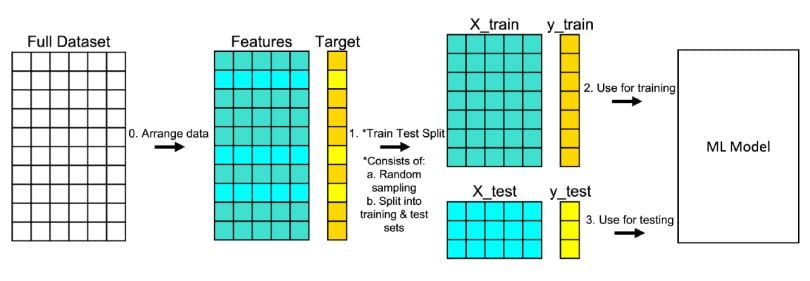
Image from https://builtin.com/data-science/train-test-split

In [ ]:
# Get all of the true labels
y = df["target"]
# Make a smaller dataset of only the age, cholesterol, and max HR achieved
basic = df[["age", 'chol', 'thalach']]
# Automatically split the dataset into train and test (80-20 split).
# Setting the random state makes it so that everyone doing the module has the same split.
# Feel free to remove it and rerun the notebook.
X_train, X_test, y_train, y_test = train_test_split(basic, y, test_size=0.20, random_state=0)

### Let's check to see if the split was done evenly. If by chance one case is significantly more represented, we can re-split the data by running it again. 

In [ ]:
print(y_train.value_counts())

## Creating a KNN Model

### K-Nearest Neighbors is a supervised learning classification algorithm. It's a supervised algorithm, because we start with data that is already labeled and learn from that data. We start the algorithm by choosing a number, $k$. Then, we train the model by "plotting" the training data and grouping them by their true label. That's it. Very simple and easy. 

### In order to classify a new point, we plot the new unknown data and then check the label of its $k$ nearest neighbors or training data points we previously plotted. These labels now "vote" on what the unknown data point should be. 

### The "nearest" part is calculated by Euclidean distances. The formula is shown below. 
$$\sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + ...}$$

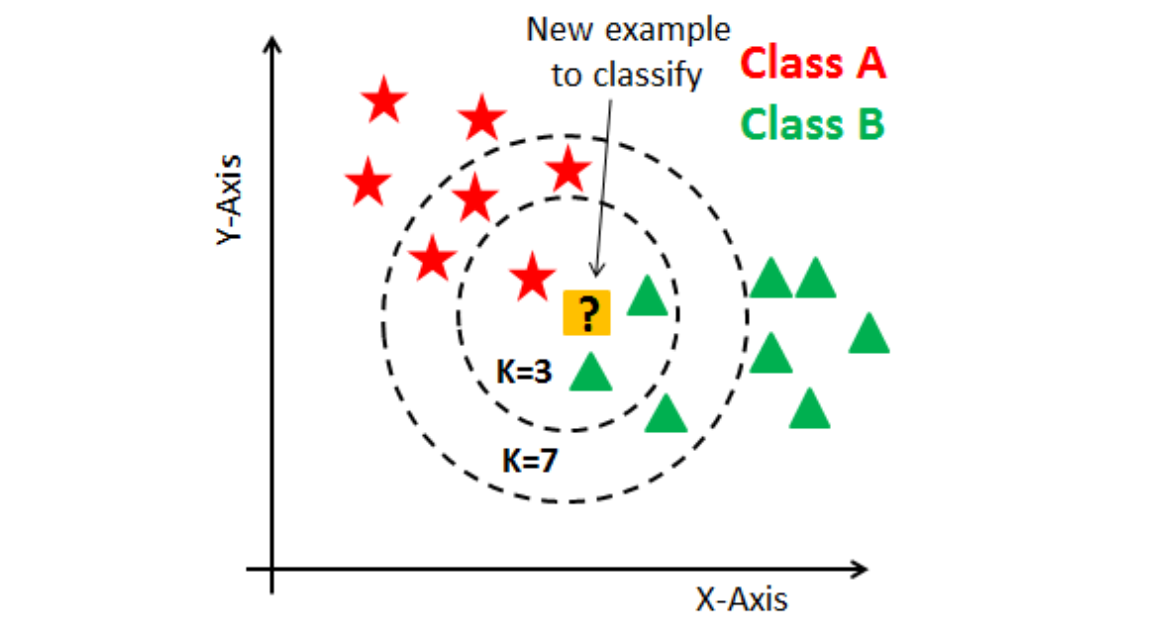
Image from https://ai.plainenglish.io/introduction-to-k-nearest-neighbors-knn-algorithm-e8617a448fa8

### Something to keep in mind: the size of $k$ will matter for accuracy and bias. The smaller $k$ is the more likely an outlier may affect the classification of a new data point. The larger the $k$ is, the more likely it will encompass multiple groups and it becomes less powerful as a classification tool as you can imagine. 

In [ ]:
# Create a K-Nearest Neighbors model with k=10
knn = KNeighborsClassifier(n_neighbors=10)
# Train the model
knn.fit(X_train, y_train)
# Use the trained model on the test data
knn_predicted = knn.predict(X_test)
# Get the confusion matrix on the results
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
# Get the accuracy
knn_acc_score = accuracy_score(y_test, knn_predicted)
# Print the results
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

### This doesn't look that good with less than a 70% accuracy rate. The confusion matrix also give a more in-depth breakdown of the labels. 
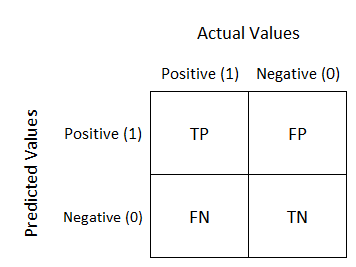
Image from https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62
### Why? What can we do to make this better?

### It turns out each feature in our data has a different range of values which means the model may be weighting some more than others. To fix this, we need to scale our data all to some standardized values. To visualize this process, refer to the image below.
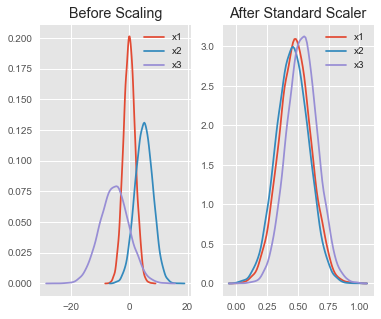
Image from http://benalexkeen.com/feature-scaling-with-scikit-learn/
### After scaling the data, the features will now be considered the same.

In [ ]:
# Create a scaler
scaler = StandardScaler()
# Scale the training data
X_train = scaler.fit_transform(X_train)
# Scale the test data
X_test = scaler.transform(X_test)

In [ ]:
# Create a K-Nearest Neighbors model with k=10
knn = KNeighborsClassifier(n_neighbors=10)
# Train the model
knn.fit(X_train, y_train)
# Use the trained model on the test data
knn_predicted = knn.predict(X_test)
# Get the confusion matrix on the results
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
# Get the accuracy
knn_acc_score = accuracy_score(y_test, knn_predicted)
# Print the results
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

### This is better! But this only a subset of the full data set. Now let's create another model, but this time using the entire set of features.

In [ ]:
# Get all of the true labels
y = df["target"]
# Get the full dataset without the labels 
feats = df.drop('target',axis=1)
# Split the data
X_train, X_test, y_train, y_test = train_test_split(feats, y, test_size=0.20, random_state=0)

In [ ]:
print(y_train.value_counts())

In [ ]:
# Create a scaler
scaler = StandardScaler()
# Scale the training data
X_train = scaler.fit_transform(X_train)
# Scale the test data
X_test = scaler.transform(X_test)

In [ ]:
# Create a K-Nearest Neighbors model with k=10
knn = KNeighborsClassifier(n_neighbors=10)
# Train the model
knn.fit(X_train, y_train)
# Use the trained model on the test data
knn_predicted = knn.predict(X_test)
# Get the confusion matrix on the results
knn_conf_matrix = confusion_matrix(y_test, knn_predicted)
# Get the accuracy
knn_acc_score = accuracy_score(y_test, knn_predicted)
# Print the results
print("confussion matrix")
print(knn_conf_matrix)
print("\n")
print("Accuracy of K-NeighborsClassifier:",knn_acc_score*100,'\n')
print(classification_report(y_test,knn_predicted))

### This is a lot better! We have almost a 90% accuracy which is a big improvement from what we started with. Now you know the K-Nearest Neighbors algorithm and how to implement, so next time you have some labeled data try to label new data with this code! You can also expand the algorithm to have multiple groups and change up the $k$ value. Try it out and see if you can get a better accuracy. 